# Task 1: Simple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
# housing = fetch_california_housing()
housing = fetch_california_housing(as_frame=True)

In [43]:
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [44]:
X = housing.data[['HouseAge']]
y = housing.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# scale = StandardScaler()
# X_train = scale.fit_transform(X_train)
# X_test = scale.transform(X_test)

In [47]:
clf = LinearRegression()
clf.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([2.03632661, 2.08363245, 2.29177815, ..., 2.14986063, 1.85656441,
       2.14039946], shape=(5160,))

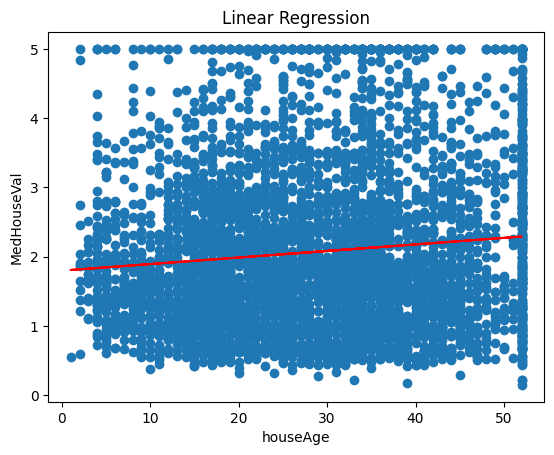

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.xlabel('houseAge')
plt.ylabel('MedHouseVal')
plt.title("Linear Regression")
plt.show()

# Task 2: Multiple Linear Regression

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
features = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

X_ = housing.data[features]
y_ = housing.target

In [54]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, random_state=42)

In [55]:
clf_ = LinearRegression()
clf_.fit(X_train_,y_train_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
y_pred_ = clf_.predict(X_test_)
y_pred_

array([1.70526618, 1.79855311, 1.7877922 , ..., 1.54471882, 2.53206047,
       2.34719581], shape=(5160,))

In [ ]:
# R-squared
r2 = r2_score(y_test_, y_pred_)
r2

0.1564316570911789

In [63]:
#  Mean Squared Error (MSE) 
mse = mean_squared_error(y_test_, y_pred_)
mse


1.1162249040685084

In [64]:
# Root Mean Squared Error (RMSE) 
rmse = np.sqrt(mse)
rmse

np.float64(1.0565154537764738)

In [66]:
clf_.coef_

array([ 1.58936478e-02,  3.46186611e-01, -1.68637021e+00,  3.53083591e-05,
       -2.62911158e-03])

In [65]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': clf_.coef_
})
print(coeff_df)

      Feature  Coefficient
0    HouseAge     0.015894
1    AveRooms     0.346187
2   AveBedrms    -1.686370
3  Population     0.000035
4    AveOccup    -0.002629


# Task 3: Feature Scaling and Normalization 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [76]:
# using scaling on previous model
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train_)
X_test_scale = scale.transform(X_test_)

In [77]:
clf_scale = LinearRegression()
clf_scale.fit(X_train_scale,y_train_)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
y_pred_scale = clf_scale.predict(X_test_scale)
y_pred_scale

array([1.70526618, 1.79855311, 1.7877922 , ..., 1.54471882, 2.53206047,
       2.34719581], shape=(5160,))

In [79]:
r2 = r2_score(y_test_, y_pred_scale)
r2

0.156431657091177

In [80]:
mse = mean_squared_error(y_test_, y_pred_scale)
mse

1.116224904068511

no changes

# Task 4: Model Interpretation

In [81]:
import seaborn as sns

<Axes: >

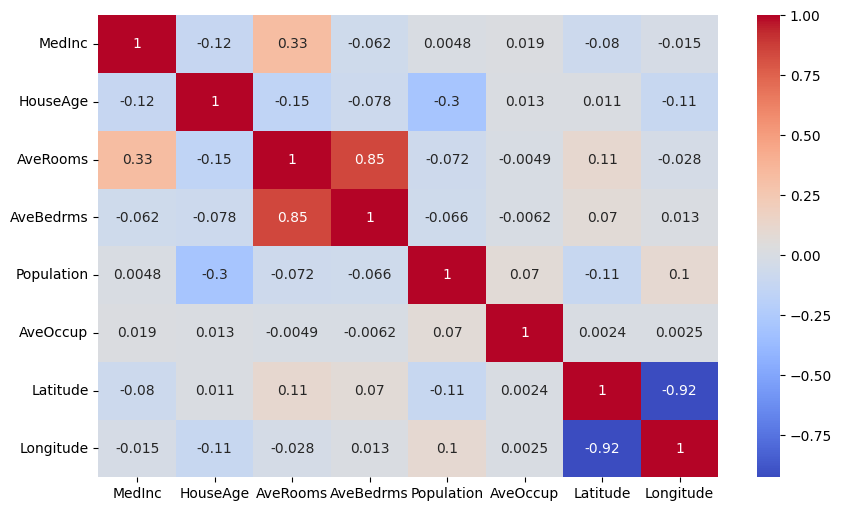

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(housing.data.corr(),annot=True, cmap='coolwarm')

In [84]:
correlations = housing.data.corrwith(housing.target)
correlations


MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64

MedInc has strongest relationship with 
the target. 

* Multicollinearity occurs when independent variables are highly correlated with each other, which can inflate the variance of coefficient estimates and make the model unstable.

* It can affect the interpretation of the coefficients making it unclear which feature is actually influencing the target.